In [46]:
!pip install wordcloud

In [47]:
# The main package to help us with our text analysis
from textblob import TextBlob

# For reading input files in CSV format
import csv

# For doing regular expressions
import re

# For sorting dictionaries
import operator


# For plotting results
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


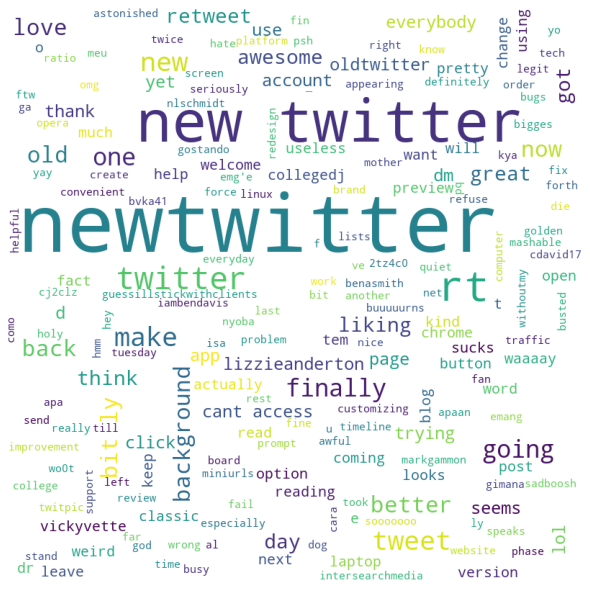

In [48]:
# The main package to help us with our text analysis
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
df = pd.read_csv(r"newtwitter.small.csv")
  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.tweet:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# Intialize an empty list to hold all of our tweets
tweets = []




TOP NEGATIVE TWEETS
id=2697983477, polarity=-0.78, clean=i don't like the #newtwitter, this version is weird!!
id=2707893267, polarity=-0.75, clean=arghhhh...esse #newtwitter  mtooo chato! :(
id=2697821842, polarity=-0.70, clean=fuck'n #newtwitter you bad ass.!!!
id=2718649841, polarity=-0.65, clean=is there not a url shortening service built into #newtwitter? am i blind? stupid? both?
id=2717383858, polarity=-0.62, clean=shit! el #newtwitter es horrible!!
id=2716533010, polarity=-0.50, clean=not trying #newtwitter again till the #fail phase is over.
id=2616580673, polarity=-0.31, clean=#newtwitter kya apa to emg'e?? ga isa nyoba new twitter dr laptop~ =(
id=2718115792, polarity=-0.30, clean=i like the #newtwitter but its slow
id=2697708251, polarity=-0.30, clean=pq meu twitter t no #newtwitter?  sucks...
id=2658714519, polarity=-0.25, clean=how to customise your background for the #newtwitter  [blog] <-- i need to get round to this!
id=2673387653, polarity=-0.22, clean=i'm here on t

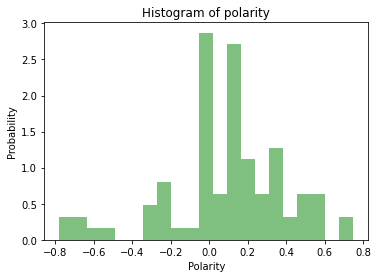

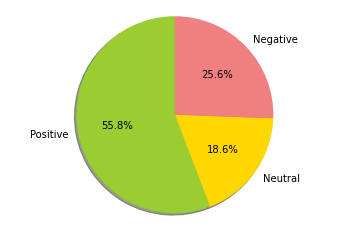

In [49]:
# A helper function that removes all the non ASCII characters
# from the given string. Retuns a string with only ASCII characters.
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)



# LOAD AND CLEAN DATA
with open('newtwitter.small.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:

        tweet= dict()
        tweet['orig'] = row[0]
        tweet['id'] = int((row[1]))
        tweet['pubdate'] = int(row[2])

        # Ignore retweets
        if re.match(r'^RT.*', tweet['orig']):
            continue

        tweet['clean'] = tweet['orig']

        # Remove all non-ascii characters
        tweet['clean'] = strip_non_ascii(tweet['clean'])

        # Normalize case
        tweet['clean'] = tweet['clean'].lower()

        # Remove URLS. (I stole this regex from the internet.)
        tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])

        # Fix classic tweet lingo
        tweet['clean'] = re.sub(r'\bthats\b', 'that is', tweet['clean'])
        tweet['clean'] = re.sub(r'\bive\b', 'i have', tweet['clean'])
        tweet['clean'] = re.sub(r'\bim\b', 'i am', tweet['clean'])
        tweet['clean'] = re.sub(r'\bya\b', 'yeah', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcant\b', 'can not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwont\b', 'will not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bid\b', 'i would', tweet['clean'])
        tweet['clean'] = re.sub(r'wtf', 'what the fuck', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwth\b', 'what the hell', tweet['clean'])
        tweet['clean'] = re.sub(r'\br\b', 'are', tweet['clean'])
        tweet['clean'] = re.sub(r'\bu\b', 'you', tweet['clean'])
        tweet['clean'] = re.sub(r'\bk\b', 'OK', tweet['clean'])
        tweet['clean'] = re.sub(r'\bsux\b', 'sucks', tweet['clean'])
        tweet['clean'] = re.sub(r'\bno+\b', 'no', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcoo+\b', 'cool', tweet['clean'])


        # Create textblob object
        tweet['TextBlob'] = TextBlob(tweet['clean'])

     

        tweets.append(tweet)

for tweet in tweets:
    tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
    tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)

    if tweet['polarity'] >= 0.1:
        tweet['sentiment'] = 'positive'
    elif tweet['polarity'] <= -0.1:
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])




# First, print out a few example tweets from each sentiment category.

print ("\n\nTOP NEGATIVE TWEETS")
negative_tweets = [d for d in tweets_sorted if d['sentiment'] == 'negative']
for tweet in negative_tweets[0:100]:
    print ("id=%d, polarity=%.2f, clean=%s" % (tweet['id'], tweet['polarity'], tweet['clean']))

print ("\n\nTOP POSITIVE TWEETS")
positive_tweets = [d for d in tweets_sorted if d['sentiment'] == 'positive']
for tweet in positive_tweets[-100:]:
    print ("id=%d, polarity=%.2f, clean=%s" % (tweet['id'], tweet['polarity'], tweet['clean']))

print ("\n\nTOP NEUTRAL TWEETS")
neutral_tweets = [d for d in tweets_sorted if d['sentiment'] == 'neutral']
for tweet in neutral_tweets[0:500]:
    print ("id=%d, polarity=%.2f, clean=%s" % (tweet['id'], tweet['polarity'], tweet['clean']))


# Next, create some plots

# A histogram of the scores.
x = [d['polarity'] for d in tweets_sorted]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()



# A pie chart showing the number of tweets in each sentiment category

pos = len(positive_tweets)
neu = len(negative_tweets)
neg = len(neutral_tweets)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()


In [50]:
#displaying all results in one dataframe
df1=pd.DataFrame(negative_tweets)
df2=pd.DataFrame(positive_tweets)
df3=pd.DataFrame(neutral_tweets)
merged_frames=[df1,df2,df3]
result=pd.concat(merged_frames)
result

,orig,id,pubdate,clean,TextBlob,polarity,subjectivity,sentiment
0,"I don't like the #NewTwitter, this version is ...",2697983477,18545,"i don't like the #newtwitter, this version is ...","(i, , d, o, n, ', t, , l, i, k, e, , t, h, ...",-0.781250,1.000000,negative
1,Arghhhh...esse #newtwitter ï¿½ mtooo chato! :(,2707893267,18546,arghhhh...esse #newtwitter mtooo chato! :(,"(a, r, g, h, h, h, h, ., ., ., e, s, s, e, , ...",-0.750000,1.000000,negative
2,fuck'n #newtwitter you bad ass.!!!,2697821842,18545,fuck'n #newtwitter you bad ass.!!!,"(f, u, c, k, ', n, , #, n, e, w, t, w, i, t, ...",-0.700000,0.633333,negative
3,Is there not a URL shortening service built in...,2718649841,18548,is there not a url shortening service built in...,"(i, s, , t, h, e, r, e, , n, o, t, , a, , ...",-0.650000,0.833333,negative
4,Shit! El #NewTwitter es horrible!!,2717383858,18547,shit! el #newtwitter es horrible!!,"(s, h, i, t, !, , e, l, , #, n, e, w, t, w, ...",-0.625000,0.900000,negative
...,...,...,...,...,...,...,...,...
17,#newtwitter !!!,2697213284,18545,#newtwitter !!!,"(#, n, e, w, t, w, i, t, t, e, r, , !, !, !)",0.000000,0.000000,neutral
18,@iambendavis #newtwitter is legit. Yo are you ...,2707697552,18546,@iambendavis #newtwitter is legit. yo are you ...,"(@, i, a, m, b, e, n, d, a, v, i, s, , #, n, ...",0.050000,0.150000,neutral
19,Dr Insult thinks #newtwitter is a complaint fr...,2717078769,18547,dr insult thinks #newtwitter is a complaint fr...,"(d, r, , i, n, s, u, l, t, , t, h, i, n, k, ...",0.050000,0.500000,neutral
20,~ OMG ! Finally the new version of Twitter... ...,2659751039,18541,~ omg ! finally the new version of twitter... ...,"(~, , o, m, g, , !, , f, i, n, a, l, l, y, ...",0.068182,0.493939,neutral


In [51]:
len(negative_tweets+positive_tweets+neutral_tweets)

86